In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils.pandasUtils import save_dt, get_main_dt, get_dt, init_stat_dt, save_stat_dt, get_stat_dt
from fuzzywuzzy import fuzz, process

/Library/Python/3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
dt = get_main_dt()
# dt_stat = get_stat_dt()
dt_stat = init_stat_dt()

dt.head()

,surface,text_type,text
image,,,
paper-4,paper,printed,50.87\nТРЕБОВАНИЯ БЕЗОПАСНОСТИ\nЦЕМЕНТ СООТВЕТ...
paper-1,paper,printed,EWL\nПЕСКОБЕТОН\nM-300\n40 RU\nCOXAR CHEC)
paper-2,paper,printed,ecomaterial\nbasic\nEMENT®\nЦЕМЕНТ\nССПЦ 500-Д...
paper-3,paper,printed,НЕ БРОСАТЬ!\nПроизводитель / Manufacturor\nОЛО...
paper-5,paper,printed,Г КВАРЦЕВЫЙ ПЕСОК\nИРАНОРНАЯ КРОШКА\nПЛЕНКА\nС...


In [3]:
dt.groupby(['surface']).size()

surface
brick      28
glass      14
gold        7
metal      20
paper      12
plastic    14
silver     16
tyre       17
wood       22
dtype: int64

In [4]:
dt.groupby(['text_type']).size()

text_type
pressed        51
printed        55
squeezedout    44
dtype: int64

In [3]:
def find_max_levenstein(expected, actual):
    same_letters = {'А': 'A', 'а': 'a',
                    'В': 'B',
                    'Е': 'E', 'е': 'e',
                    'К': 'K', 'к': 'k',
                    'М': 'M',
                    'Н': 'H',
                    'О': 'O', 'о': 'o',
                    'Р': 'P', 'р': 'p',
                    'С': 'C', 'с': 'c',
                    'Т': 'T',
                    'У': 'Y', 'у': 'y',
                    'Х': 'X', 'х': 'x',
                    }
    for oldChar, newChar in same_letters.items():
        expected = expected.replace(oldChar, newChar)
        actual = actual.replace(oldChar, newChar)

    levenstein = fuzz.ratio(expected, actual)
    same_letters_2 = {'З': '3', 'з': '3',
                      'О': '0', 'о': '0',
                      'I': '1',
                      'l': '1',
                      }
    for oldChar, newChar in same_letters_2.items():
        expected = expected.replace(oldChar, newChar)
        actual = actual.replace(oldChar, newChar)

    levenstein = max(levenstein, fuzz.ratio(expected, actual))
    return levenstein

In [4]:
def get_dt_(data_name):
    dt_ = get_dt(data_name)
    print(dt_.head(5))
    return dt_


def add_levenstein(dt_, data_name):
    dt_ = dt_.assign(levenstein=pd.Series(np.random.randn(len(dt_))).values)

    for image in dt_.index:
        if image in dt.index.values:
            expected = str(dt.text.loc[image])
            actual = dt_[data_name].loc[image]
            actual_str = '' if actual == np.nan else str(actual)

            dt_.loc[image] = actual, find_max_levenstein(expected.lower(), actual_str)

    print(dt_.head())
    return dt_

In [10]:
from statistics import median, mean

def stat(dt_, data_name):
    plt.hist(dt_.levenstein,
             bins=20,
             rwidth=0.4)
    plt.ylabel('Image')
    plt.xlabel('Levenstein')
    print(plt.show())

    surfaces = np.unique(dt.surface.values)
    text_types = np.unique(dt.text_type.values)

    for surface in surfaces:
        images = dt.loc[dt.surface == surface].index.values
        mask = [x in images for x in dt_.image.values]
        values = sorted(dt_[mask].levenstein)
        dt_stat.loc(axis=0)[data_name, surface] = mean(values), median(values), min(values), max(values)

    for text_type in text_types:
        images = dt.loc[dt.text_type == text_type].index.values
        mask = [x in images for x in dt_.image.values]
        values = sorted(dt_[mask].levenstein)
        dt_stat.loc(axis=0)[data_name, text_type] = mean(values), median(values), min(values), max(values)

    values = sorted(dt_.levenstein)
    dt_stat.loc(axis=0)[data_name, 'common'] = mean(values), median(values), min(values), max(values)
    save_stat_dt(dt_stat)

                                                      image  levenstein
easyocr                                                                
50 кг 8т 'безопасности safety requirements треб...  paper-4    1.503904
nwi пескобеток [-з0б иихая сиви аокг                paper-1    0.235089
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...  paper-2    0.049237
птомагад шапukulurn адотвск рассмg; баикортоста...  paper-3   -0.434599
660 muk халевол ocп 3 e1 2500x1250x12 ty 5534-6...  wood-16   -1.047945
                                                      image  levenstein
easyocr                                                                
50 кг 8т 'безопасности safety requirements треб...  paper-4    0.695485
nwi пескобеток [-з0б иихая сиви аокг                paper-1    0.420430
ны ement ппромемеит 1p сспц 500-д20 ~ # |_= рас...  paper-2   -0.619687
птомагад шапukulurn адотвск рассмg; баикортоста...  paper-3    0.413806
660 muk халевол ocп 3 e1 2500x1250x12 ty 5534-6...  wood-16   -0

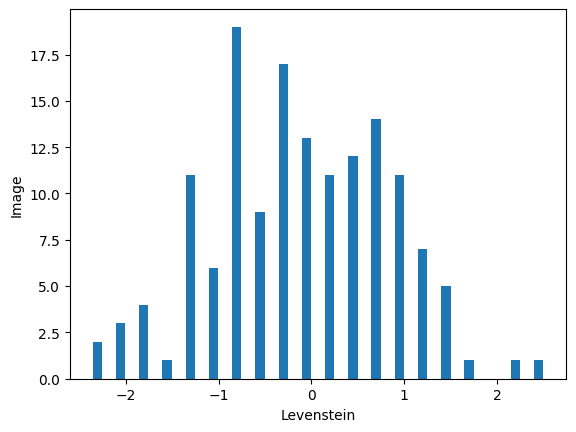

None


In [11]:
from utils.utils import easyocr_column_name

dt_easyocr = get_dt_(easyocr_column_name)
dt_easyocr = add_levenstein(dt_easyocr, easyocr_column_name)
stat(dt_easyocr, easyocr_column_name)
save_dt(dt_easyocr, easyocr_column_name)

                                                      image  levenstein
pytesseract                                                            
neckobetok\nlm\n\n                                  paper-1   -0.931580
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...  paper-2    0.954983
2, tokiheakay\nshkortostan, 4891\nteleak #73479...  paper-3   -1.047322
tulatendho pasmewwats chkvyi                        paper-4    1.190951
NaN                                                 paper-5   -0.061683
                                                      image  levenstein
pytesseract                                                            
neckobetok\nlm\n\n                                  paper-1   -0.522522
nw ement\n\necomaterial\ncct, 500-1120 basi¢\ny...  paper-2   -0.018363
2, tokiheakay\nshkortostan, 4891\nteleak #73479...  paper-3    2.006559
tulatendho pasmewwats chkvyi                        paper-4   -0.201324
NaN                                                 paper-5    1

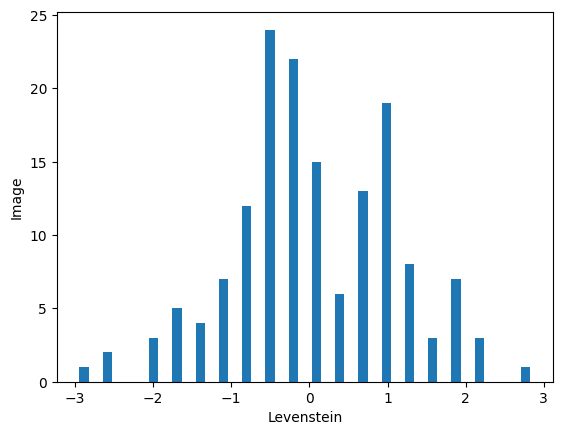

None


In [12]:
from utils.utils import pytesseract_column_name

dt_pytesseract = get_dt_(pytesseract_column_name)
dt_pytesseract = add_levenstein(dt_pytesseract, pytesseract_column_name)
stat(dt_pytesseract, pytesseract_column_name)
save_dt(dt_pytesseract, pytesseract_column_name)

                                                      image  levenstein
doctr                                                                  
50.81 safety requirements gost 31108-2016 and a...  paper-4    0.436838
nwl neckobetok m-300 cyxan chece ienentho-rscm ...  paper-1   -0.569111
jement ebpomeewt ecomaterial basic tpyn ccn4500...  paper-2    0.098131
he spocatb! pomamopwren, - manufacturer oaohsck...  paper-3   -0.123071
xotio,hbaa acoaibi "onmmkc" bcenoroahbi ot-20 a...  paper-5   -1.282111
                                                      image  levenstein
doctr                                                                  
50.81 safety requirements gost 31108-2016 and a...  paper-4   -0.729740
nwl neckobetok m-300 cyxan chece ienentho-rscm ...  paper-1   -0.120019
jement ebpomeewt ecomaterial basic tpyn ccn4500...  paper-2    0.193782
he spocatb! pomamopwren, - manufacturer oaohsck...  paper-3    0.614064
xotio,hbaa acoaibi "onmmkc" bcenoroahbi ot-20 a...  paper-5    1

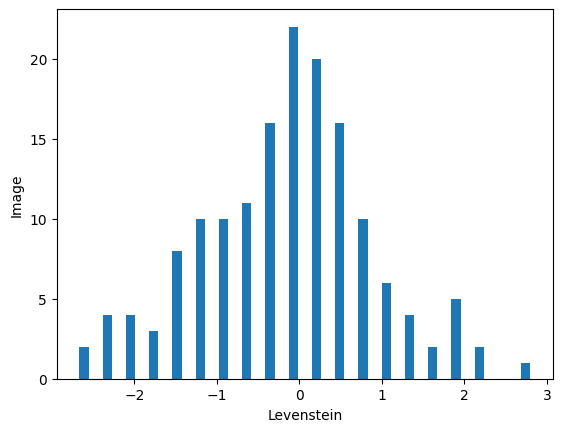

None


In [13]:
from utils.utils import doctr_column_name

dt_doctr = get_dt_(doctr_column_name)
dt_doctr = add_levenstein(dt_doctr, doctr_column_name)
stat(dt_doctr, doctr_column_name)
save_dt(dt_doctr, doctr_column_name)

In [43]:
save_stat_dt(dt_stat)

stat_types = np.unique(dt_stat.index.get_level_values(1))
for stat_type in stat_types:
    print('Type:' + stat_type)
    print(dt_stat.xs(stat_type, level='type').sort_values('mean', ascending=False))
    print('___________________________________________________')
    print()

Type:brick
                 mean    median       min       max
model                                              
doctr        0.098242 -0.022277 -1.921417  2.070242
easyocr     -0.071632 -0.204369 -1.354331  1.028887
pytesseract -0.329914 -0.472749 -2.062537   1.21789
___________________________________________________

Type:common
                 mean    median       min       max
model                                              
pytesseract   0.03786 -0.112816 -3.032238  2.917503
easyocr     -0.114352 -0.152045 -2.432229  2.576692
doctr       -0.148047  -0.06953 -2.748216  2.882581
___________________________________________________

Type:glass
                 mean    median       min       max
model                                              
pytesseract  0.400257  0.753124 -1.802995  1.209811
doctr        0.193006  0.215103 -0.971558  1.993753
easyocr     -0.807151 -1.120707 -2.097058  1.454277
___________________________________________________

Type:gold
                 